<a href="https://colab.research.google.com/github/akmadan/PythonForFinance/blob/main/2.%20Drawing_Line_Charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drawing Charts for Visual Analysis**

In [26]:
# !pip install yfinance
# # !pip install cufflinks

In [17]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Plotly and Cufflinks
import plotly

## For Using in Colab, we need to set renderer as colab
import plotly.io as pio
cf.set_config_file(offline=True)
pio.renderers.default = 'colab'
import cufflinks as cf

In [9]:
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [10]:
from datetime import datetime
import yfinance as yf
import pandas_datareader.data as data


yf.pdr_override()

start = datetime.strptime('2010-01-01', '%Y-%m-%d')
end = datetime.strptime('2020-01-01', '%Y-%m-%d')

sbi = data.get_data_yahoo("SBIN.NS", start, end)

sbi.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,227.500000,230.000000,227.500000,229.119995,202.633759,11031470
2010-01-05,230.800003,231.000000,228.009995,229.205002,202.708969,11613740
2010-01-06,229.699997,231.500000,228.500000,230.580002,203.925034,14527930
2010-01-07,230.600006,231.000000,228.110001,229.289993,202.784103,8576510
2010-01-08,229.399994,230.389999,228.009995,228.604996,202.178329,10453820


**Drawing a Simple Line Chart for Closing Price**

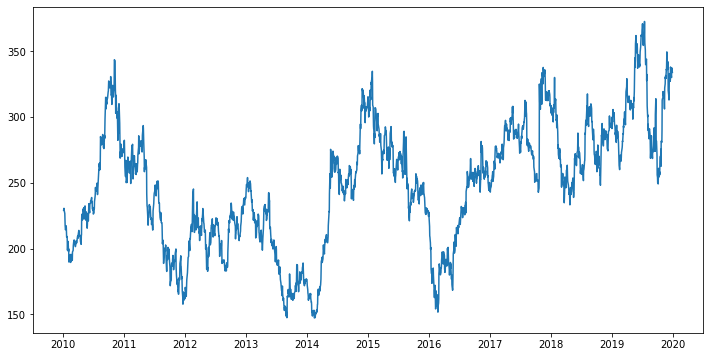

In [11]:
plt.figure(figsize=(12,6))
plt.plot(sbi['Close'])
plt.show()

**Plotting For a Range of Dates**

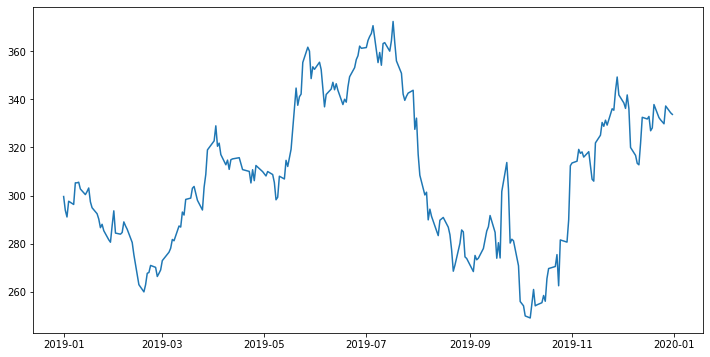

In [12]:
plt.figure(figsize=(12,6))
plt.plot(sbi.loc['2019-01-01': '2020-12-31']['Close'])
plt.show()

In [18]:
sbi['Close'].iplot()

**Customizing Plotly Charts**

In [19]:
## Filling the Chart - Area Chart
sbi['Close'].iplot(fill = True)

In [21]:
## Different Color Scales in Cufflinks
cf.colors.scales()

In [24]:
## Using a Color Scale
sbi['Close'].iplot(fill = True, colorscale = 'polar')

In [29]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [32]:
## Using a Theme
sbi['Close'].iplot(fill = True, colorscale = 'polar', theme = 'space')

In [34]:
## Adding Labels

sbi['Close'].iplot(fill = True, colorscale = 'rdgy', theme = 'space', 
                   title = 'SBI Chart', xTitle = 'Years', 
                   yTitle = 'Price')

**Drawing 2 Charts on Same Graph**

In [40]:
zeel = data.get_data_yahoo("ZEEL.NS", start, end)

[*********************100%***********************]  1 of 1 completed


In [41]:
## Method 1 - Using Plotly Graph Objects
## Now I have 2 Stocks Data SBI and ZEEL. Lets Plot their 
## Closing Prices Line Chart

import plotly.graph_objects as go
fig = go.Figure() 
fig.add_trace(go.Line(x =sbi.index, y =  sbi['Close']))
fig.add_trace(go.Line(x =zeel.index, y =  zeel['Close']))
fig.show()

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [49]:
## Method 2 - Combining Datasets to form a new Dataframe

sbi_zeel = pd.DataFrame(pd.concat([sbi['Close'], zeel['Close']], axis = 1))
sbi_zeel.columns = ['SBI', 'ZEEL']
sbi_zeel.head()

,SBI,ZEEL
Date,,
2010-01-04,229.119995,118.354012
2010-01-05,229.205002,119.643013
2010-01-06,230.580002,122.291336
2010-01-07,229.289993,122.361641
2010-01-08,228.604996,120.533600


In [51]:
sbi_zeel.iplot(theme = 'space', fill = True)

**Kind = Spread**

In [52]:
sbi_zeel.iplot(theme = 'space', fill = True, kind = 'spread')

/usr/local/lib/python3.7/dist-packages/cufflinks/plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/usr/local/lib/python3.7/dist-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

